# Heart Disease Final Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                120.0  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [42]:
df.head().T

0          1          2          3          4
Age                        56.0       69.0       46.0       32.0       60.0
Gender                     Male     Female       Male     Female       Male
Blood Pressure            153.0      146.0      126.0      122.0      166.0
Cholesterol Level         155.0      286.0      216.0      293.0      242.0
Exercise Habits            High       High        Low       High        Low
Smoking                     Yes         No         No        Yes        Yes
Family Heart Disease        Yes        Yes         No        Yes        Yes
Diabetes                     No        Yes         No         No        Yes
BMI                   24.991591  25.221799  29.855447  24.130477  20.486289
High Blood Pressure         Yes         No         No        Yes        Yes
Low HDL Cholesterol         Yes        Yes        Yes         No         No
High LDL Cholesterol         No         No        Yes        Yes         No
Alcohol Consumption        High     Medium        Low        Low        Low
Stress Level             Medium       High        Low       High       High
Sleep Hours            7.633228   8.744034    4.44044   5.249405   7.030971
Sugar Consumption        Medium     Medium        Low       High       High
Triglyceride Level        342.0      133.0      393.0      293.0      263.0
Fasting Blood Sugar       120.0      157.0       92.0       94.0      154.0
CRP Level             12.969246   9.355389  12.709873  12.509046  10.381259
Homocysteine Level     12.38725  19.298875  11.230926   5.961958   8.153887
Heart Disease Status         No         No         No         No         No
Status_Num                    0          0          0          0          0

In [43]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status',
       'Status_Num'],
      dtype='object')

In [44]:
df.shape

(10000, 22)

In [45]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape

(10000, 22)

In [46]:
# Check null values
df.isnull().sum()

Age                        0
Gender                    19
Blood Pressure             0
Cholesterol Level          0
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                        0
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours                0
Sugar Consumption         30
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Heart Disease Status       0
Status_Num                 0
dtype: int64

In [47]:
# Fill missing values with median for numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Confirm no missing values remain
df.isnull().sum()

Age                        0
Gender                    19
Blood Pressure             0
Cholesterol Level          0
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                        0
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours                0
Sugar Consumption         30
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Heart Disease Status       0
Status_Num                 0
dtype: int64

In [48]:
df.describe().T

count        mean        std         min         25%  \
Age                  10000.0   49.295400  18.167574   18.000000   34.000000   
Blood Pressure       10000.0  149.758200  17.556268  120.000000  134.000000   
Cholesterol Level    10000.0  225.427300  43.510401  150.000000  187.000000   
BMI                  10000.0   29.077274   6.300156   18.002837   23.668887   
Sleep Hours          10000.0    6.991359   1.751002    4.000605    5.455288   
Triglyceride Level   10000.0  250.732500  86.953962  100.000000  176.000000   
Fasting Blood Sugar  10000.0  120.141900  23.558053   80.000000   99.000000   
CRP Level            10000.0    7.472200   4.334601    0.003647    3.681800   
Homocysteine Level   10000.0   12.456177   4.319100    5.000236    8.729771   
Status_Num           10000.0    0.200000   0.400020    0.000000    0.000000   

                            50%         75%         max  
Age                   49.000000   65.000000   80.000000  
Blood Pressure       150.000000  165.000000  180.000000  
Cholesterol Level    226.000000  263.000000  300.000000  
BMI                   29.079492   34.509009   39.996954  
Sleep Hours            7.003252    8.527938    9.999952  
Triglyceride Level   250.000000  326.000000  400.000000  
Fasting Blood Sugar  120.000000  141.000000  160.000000  
CRP Level              7.472164   11.244879   14.997087  
Homocysteine Level    12.409395   16.130968   19.999037  
Status_Num             0.000000    0.000000    1.000000

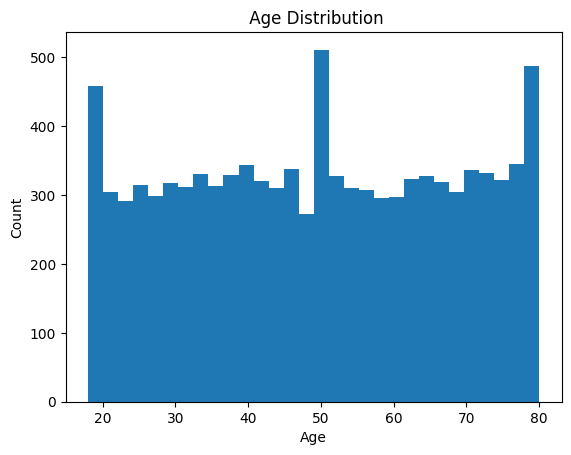

In [50]:
plt.figure()
plt.hist(df['Age'], bins=30)
plt.title(' Age Distribution')
plt.xlabel('Age'); plt.ylabel('Count')
plt.show()

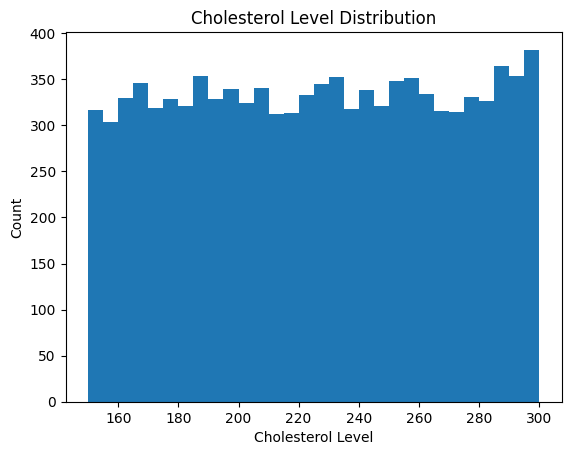

In [51]:
plt.figure()
plt.hist(df['Cholesterol Level'], bins=30)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level'); plt.ylabel('Count')
plt.show()

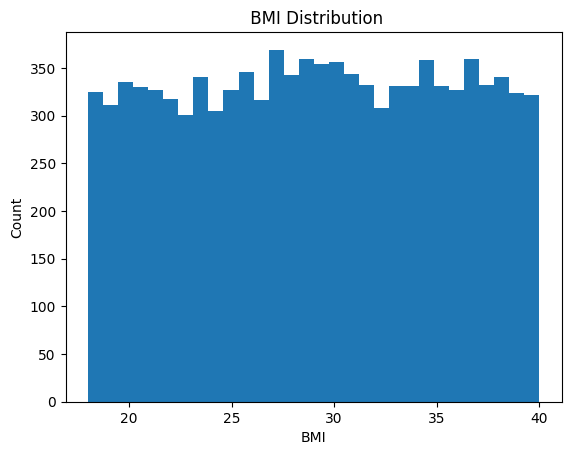

In [52]:
plt.figure()
plt.hist(df['BMI'], bins=30)
plt.title(' BMI Distribution')
plt.xlabel('BMI'); plt.ylabel('Count')
plt.show()

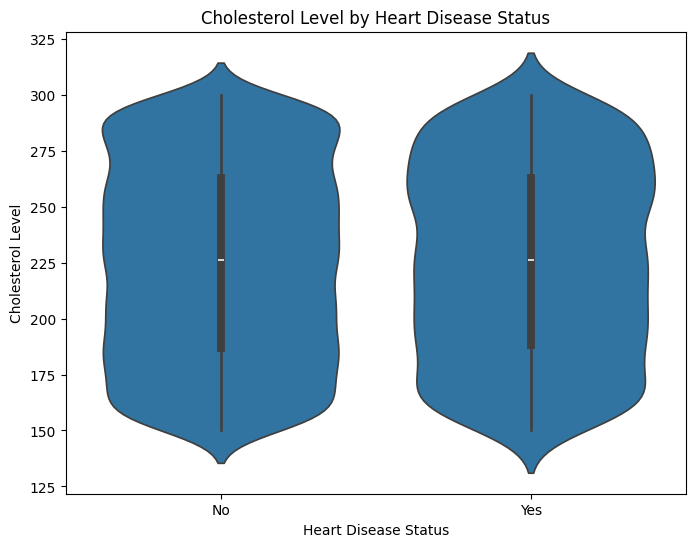

In [38]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Heart Disease Status', y='Cholesterol Level', data=df)
plt.title('Cholesterol Level by Heart Disease Status')
plt.show()

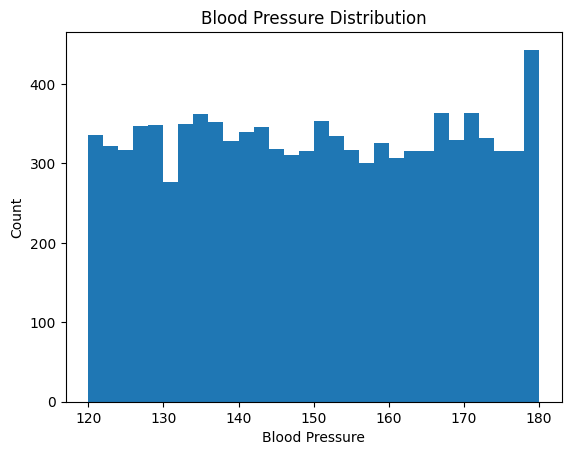

In [53]:
plt.figure()
plt.hist(df['Blood Pressure'], bins=30)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure'); plt.ylabel('Count')
plt.show()

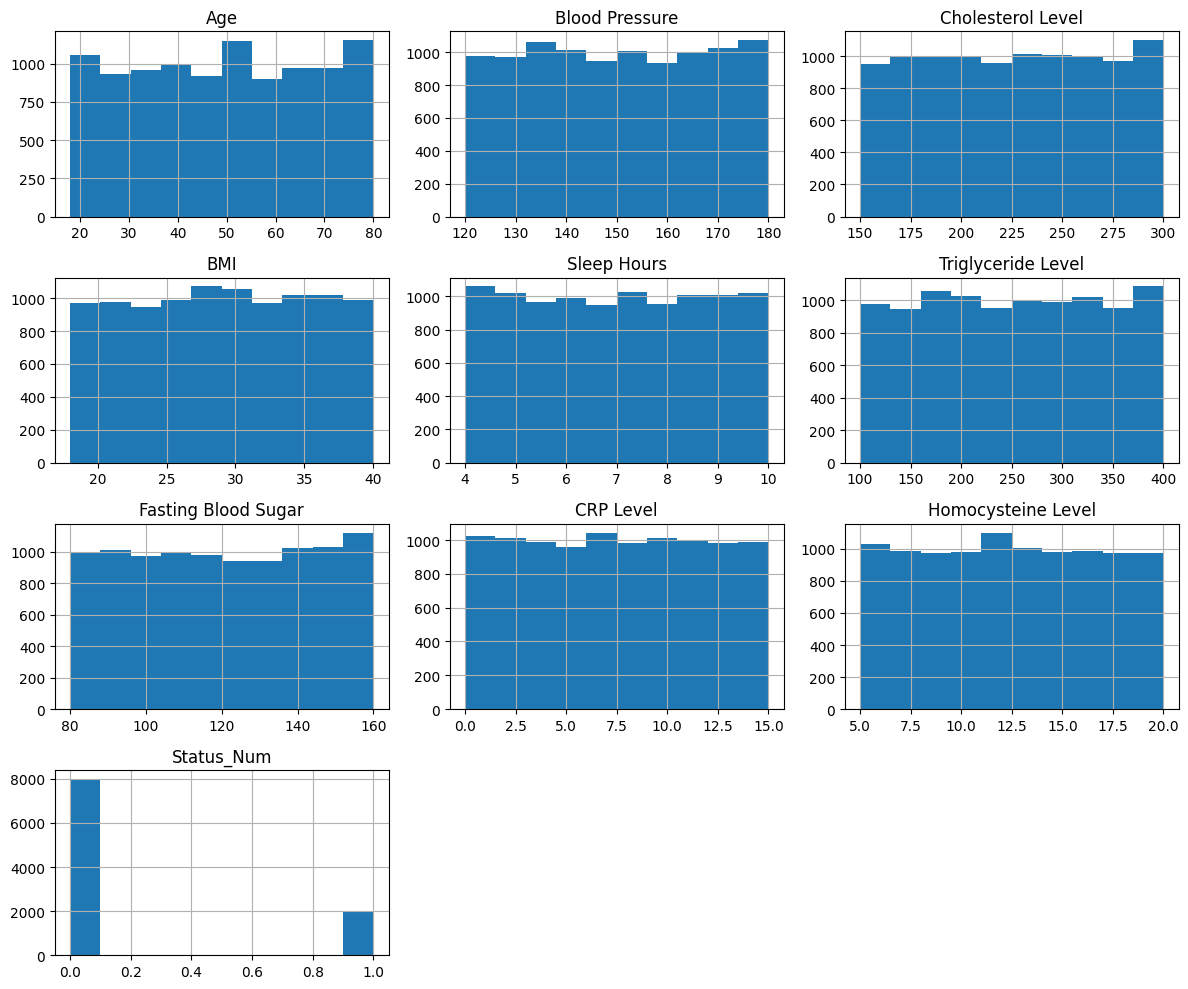

In [33]:
df.hist(figsize=(12, 10))
plt.tight_layout()

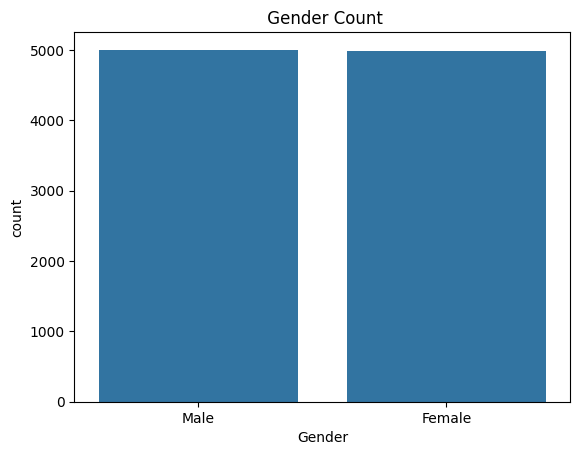

In [54]:
plt.figure()
sns.countplot(x='Gender', data=df)
plt.title(' Gender Count')
plt.show()

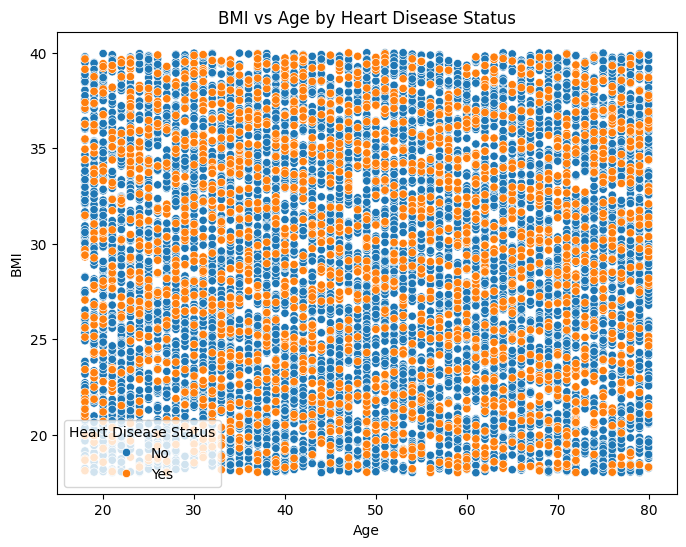

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', hue='Heart Disease Status', data=df)
plt.title('BMI vs Age by Heart Disease Status')
plt.show()

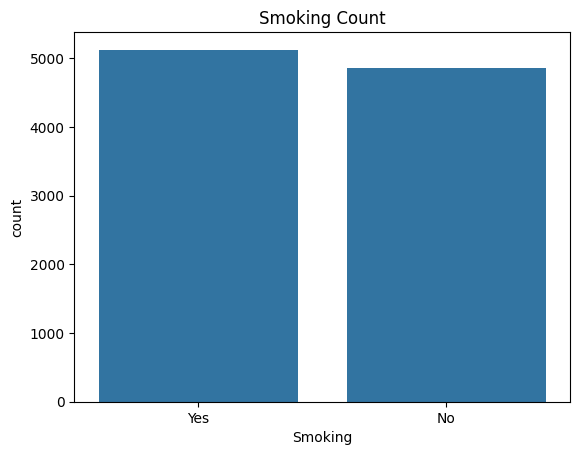

In [55]:
plt.figure()
sns.countplot(x='Smoking', data=df)
plt.title('Smoking Count')
plt.show()

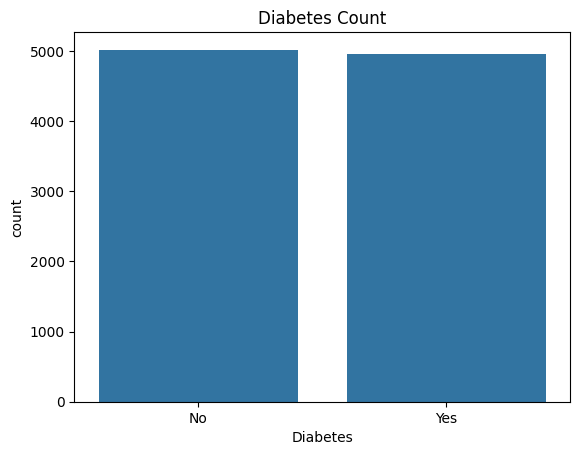

In [56]:
plt.figure()
sns.countplot(x='Diabetes', data=df)
plt.title('Diabetes Count')
plt.show()

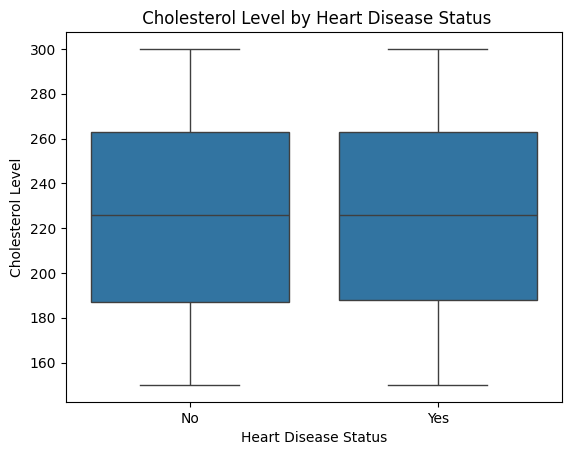

In [57]:
plt.figure()
sns.boxplot(x='Heart Disease Status', y='Cholesterol Level', data=df)
plt.title(' Cholesterol Level by Heart Disease Status')
plt.show()

<ipython-input-12-99eb5686491f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Age', hue='Heart Disease Status', shade=True)


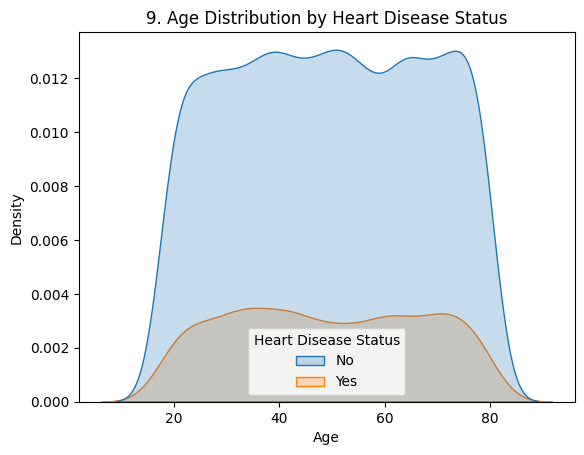

In [12]:
plt.figure()
sns.kdeplot(data=df, x='Age', hue='Heart Disease Status', shade=True)
plt.title('9. Age Distribution by Heart Disease Status')
plt.show()

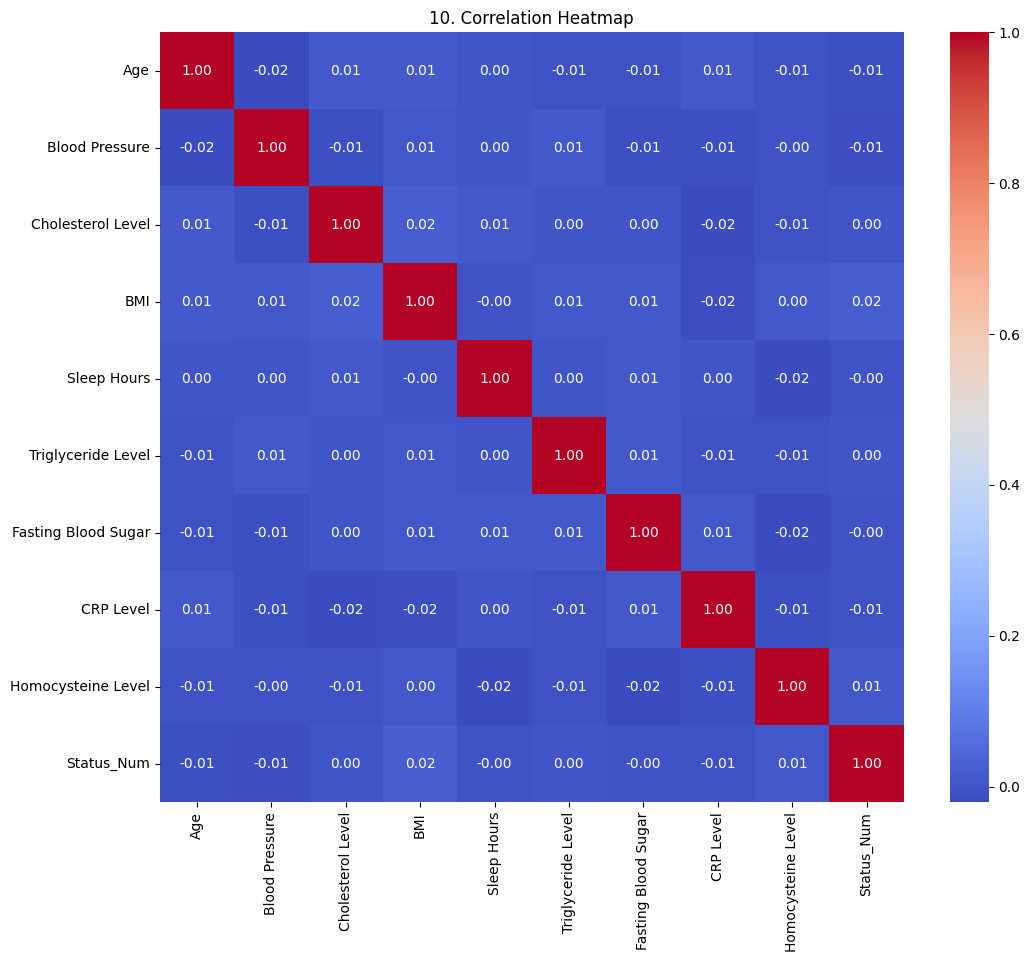

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('10. Correlation Heatmap')
plt.show()

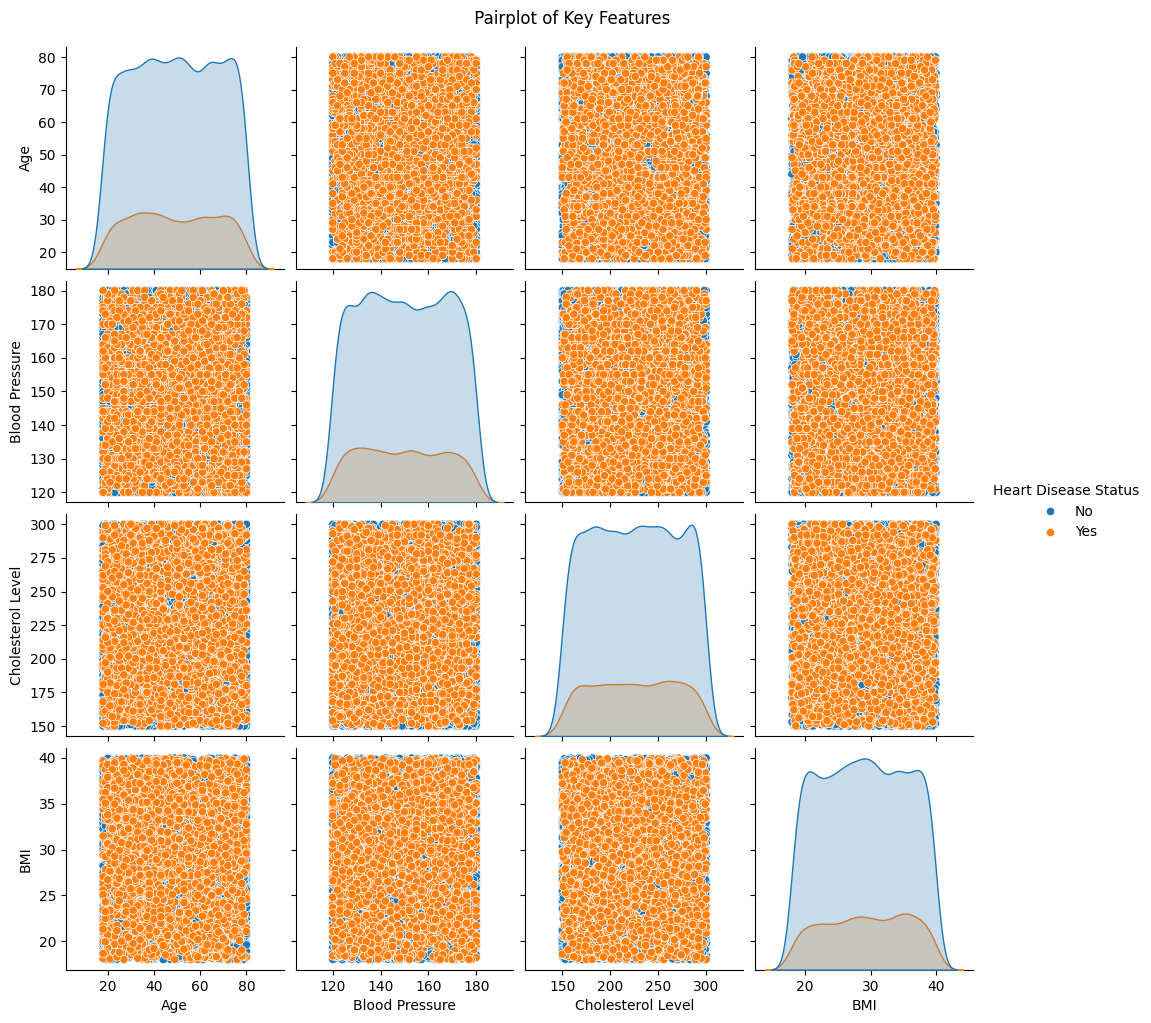

In [36]:
sns.pairplot(df, vars=['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI'], hue='Heart Disease Status')
plt.suptitle(' Pairplot of Key Features', y=1.02)
plt.show()

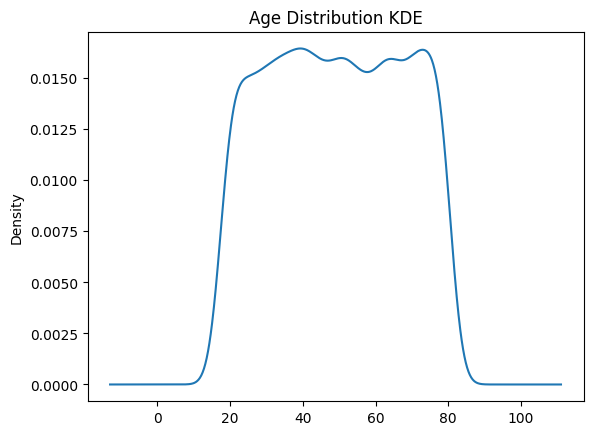

In [19]:
fig, ax = plt.subplots()
df['Age'].plot.kde(ax=ax)
ax.set_title('Age Distribution KDE')
plt.show()

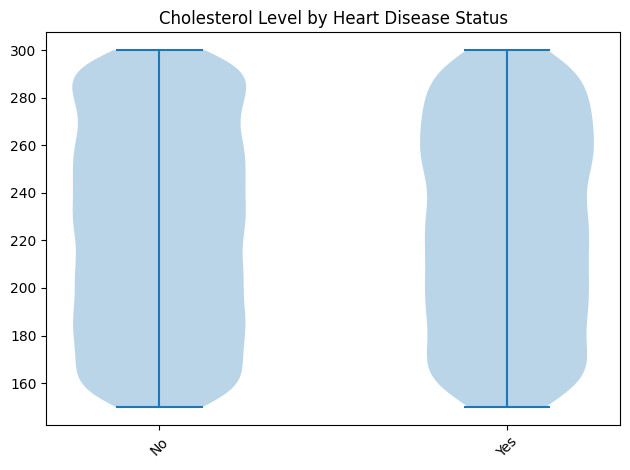

In [20]:
statuses = df['Heart Disease Status'].unique()
data_by_status = [df[df['Heart Disease Status'] == s]['Cholesterol Level'] for s in statuses]
fig, ax = plt.subplots()
ax.violinplot(data_by_status)
ax.set_xticks(range(1, len(statuses) + 1))
ax.set_xticklabels(statuses, rotation=45)
ax.set_title('Cholesterol Level by Heart Disease Status')
plt.tight_layout()
plt.show()

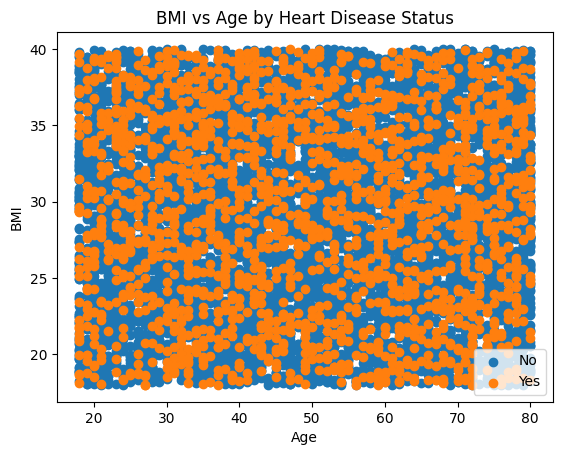

In [21]:
fig, ax = plt.subplots()
for s in statuses:
    subset = df[df['Heart Disease Status'] == s]
    ax.scatter(subset['Age'], subset['BMI'], label=str(s))
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_title('BMI vs Age by Heart Disease Status')
ax.legend()
plt.show()

In [3]:
le = LabelEncoder()
df['Status_Num'] = le.fit_transform(df['Heart Disease Status'])
X = df.select_dtypes(include=[np.number]).drop(columns=['Status_Num'])
y = df['Status_Num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (8000, 9) Test: (2000, 9)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
df['Status_Num'] = le.fit_transform(df['Heart Disease Status'])

# Feature matrix and target vector
X = df.select_dtypes(include=[np.number]).drop(columns=['Status_Num'])
y = df['Status_Num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 8000
Test samples: 2000


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))
print('\nClassification Report:\n', classification_report(y_test, y_pred_log))
print('ROC AUC:', roc_auc_score(y_test, y_prob_log))

Logistic Regression Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

ROC AUC: 0.48118281250000006


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.682


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8


In [15]:
log_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

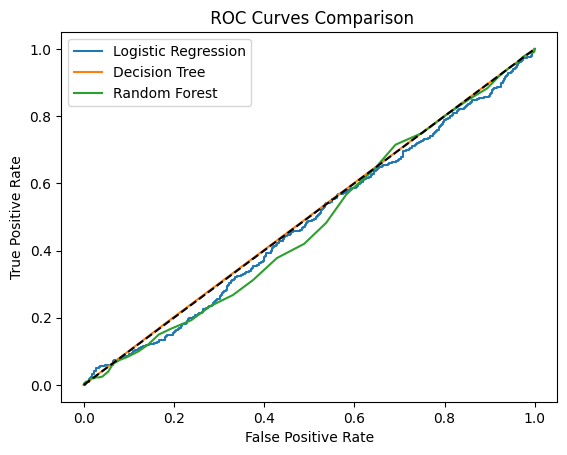

In [37]:
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_dt = dt_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.title(' ROC Curves Comparison')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.show()

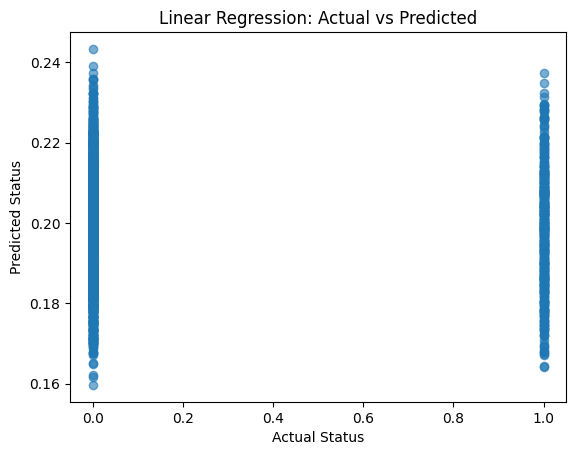

In [35]:
lin_model = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Status'); plt.ylabel('Predicted Status'); plt.show()

## Conclusion
- We compared Logistic Regression, Decision Tree, and Random Forest models.
- Random Forest achieved the highest accuracy.
- ROC AUC provides insight into classifier discrimination capability.
- Further improvements could include hyperparameter tuning and feature engineering.